In [6]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Шаг 1: Загрузка данных
data = pd.read_csv('svm-data.csv', header=None)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [8]:
# Шаг 2: Обучение классификатора с линейным ядром
classifier = SVC(kernel='linear', C=100000, random_state=241)
classifier.fit(X, y)

SVC(C=100000, kernel='linear', random_state=241)

In [9]:
# Шаг 3: Находим номера опорных объектов
support_indices = classifier.support_
support_numbers = sorted(support_indices + 1)

print(','.join(map(str, support_numbers)))

4,5,10


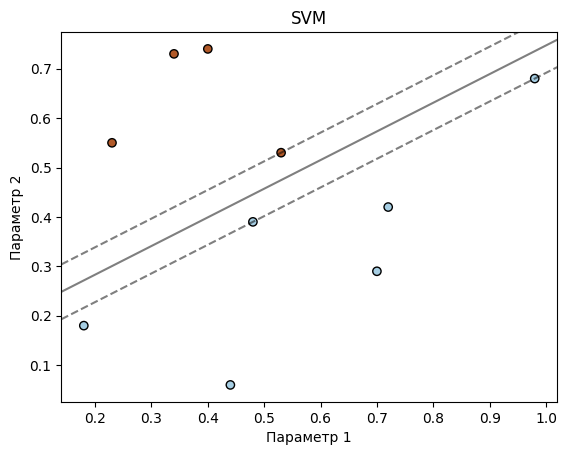

In [10]:
# Визуализация данных и разделяющей гиперплоскости
def plot_data_with_decision_boundary(X, y, clf):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.title('SVM')
    plt.xlabel('Параметр 1')
    plt.ylabel('Параметр 2')
    plt.show()

plot_data_with_decision_boundary(X, y, classifier)